# Deep CNN Cat and Dog Predictor

In [2]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

### Data Processed and Explored 

In [4]:
TRAIN_DIR = 'data/train/'
TEST_DIR = 'data/test/'

ROWS = 256
COLS = 256
ROWS2 = 64
COLS2 = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]
train_images = train_dogs[:10000] + train_cats[:10000]
random.shuffle(train_images)
test_images =  test_images[:1000]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) 
    b,g,r = cv2.split(img)
    img2 = cv2.merge([r,g,b])
    return cv2.resize(img2, (ROWS2, COLS2), interpolation=cv2.INTER_CUBIC)

def read_image2(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(img)
    img2 = cv2.merge([r,g,b])
    return cv2.resize(img2, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS2, COLS2), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%1000 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

def prep_data2(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image2(image_file)
        data[i] = image.T
        if i%500 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)
test = prep_data(test_images)
test2 = prep_data2(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 20000
Processed 1000 of 20000
Processed 2000 of 20000
Processed 3000 of 20000
Processed 4000 of 20000
Processed 5000 of 20000
Processed 6000 of 20000
Processed 7000 of 20000
Processed 8000 of 20000
Processed 9000 of 20000
Processed 10000 of 20000
Processed 11000 of 20000
Processed 12000 of 20000
Processed 13000 of 20000
Processed 14000 of 20000
Processed 15000 of 20000
Processed 16000 of 20000
Processed 17000 of 20000
Processed 18000 of 20000
Processed 19000 of 20000
Processed 0 of 1000
Processed 0 of 1000
Processed 500 of 1000
Train shape: (20000, 3, 64, 64)
Test shape: (1000, 3, 64, 64)


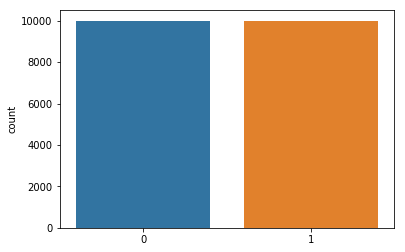

In [12]:
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

sns.countplot(labels)
plt.show()

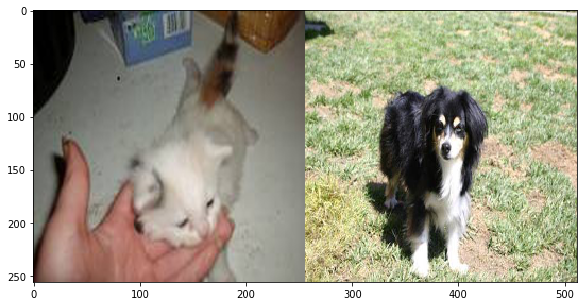

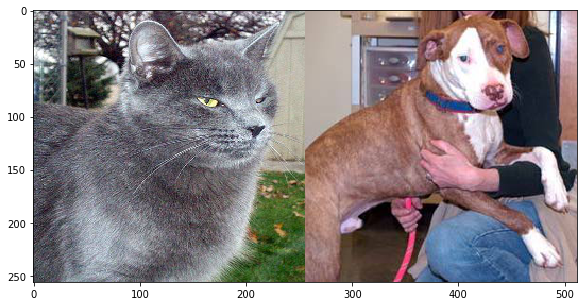

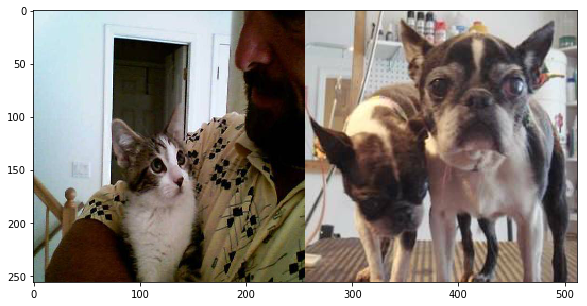

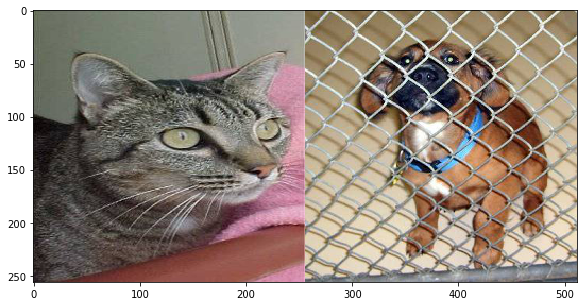

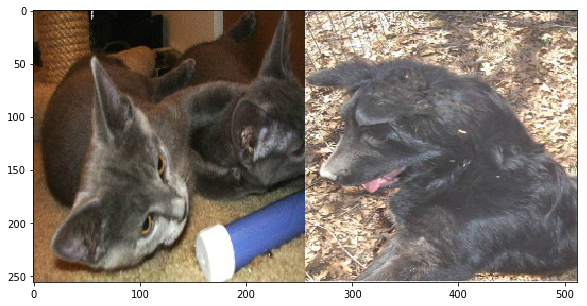

In [6]:
def show_cats_and_dogs(idx):
    cat = read_image2(train_cats[idx])
    dog = read_image2(train_dogs[idx])
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,5):
    show_cats_and_dogs(idx)

### Deep CNN Built and Trained 

In [11]:
optimizer = RMSprop(lr=1e-4)
objective = 'binary_crossentropy'


def catdog():
    
    model = Sequential()

    model.add(Conv2D(32, 3, padding='same', input_shape=train.shape[1:], activation='relu'))
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    print("Compiling Deep model...")
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

print("Creating Deep model:")
model.summary()
model = catdog()


Creating Deep model:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 3, 64, 32)         18464     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 64, 32)         9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 32, 16)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 32, 64)         9280      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 32, 64)         36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 16, 32)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 16, 128)        

running model...
Train on 15000 samples, validate on 5000 samples
Epoch 1/10
 - 267s - loss: 0.6958 - acc: 0.5458 - val_loss: 0.7274 - val_acc: 0.5294
Epoch 2/10
 - 271s - loss: 0.6387 - acc: 0.6407 - val_loss: 0.6213 - val_acc: 0.6386
Epoch 3/10
 - 282s - loss: 0.6142 - acc: 0.6627 - val_loss: 0.6312 - val_acc: 0.6484
Epoch 4/10
 - 279s - loss: 0.5966 - acc: 0.6853 - val_loss: 0.6237 - val_acc: 0.6452
Epoch 5/10
 - 289s - loss: 0.5923 - acc: 0.6916 - val_loss: 0.6059 - val_acc: 0.6734
Epoch 6/10
 - 257s - loss: 0.5811 - acc: 0.7007 - val_loss: 0.6184 - val_acc: 0.6646
Epoch 7/10
 - 245s - loss: 0.5746 - acc: 0.7094 - val_loss: 0.5803 - val_acc: 0.7042
Epoch 8/10
 - 286s - loss: 0.5595 - acc: 0.7205 - val_loss: 0.6077 - val_acc: 0.6808
Epoch 9/10
 - 296s - loss: 0.5529 - acc: 0.7305 - val_loss: 0.6492 - val_acc: 0.6754
Epoch 10/10
 - 245s - loss: 0.5362 - acc: 0.7447 - val_loss: 0.6521 - val_acc: 0.6660
Epoch 00010: early stopping
making predictions on test set...


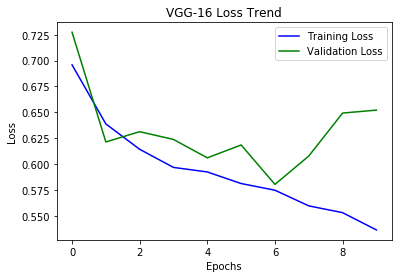

In [8]:
epochs = 10
batch_size = 16

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
       

def run_catdog():
    
    history = LossHistory()
    print("running model...")
    model.fit(train, labels, batch_size=batch_size, epochs=epochs,
              validation_split=0.25, verbose=2, shuffle=True, callbacks=[history, early_stopping])
    
    print("making predictions on test set...")
    predictions = model.predict(test, verbose=0)
    return predictions, history

predictions, history = run_catdog()

loss = history.losses
val_loss = history.val_losses


plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

### Predicting Cat Versus Dogs

I am 83.23% sure this is a Dog


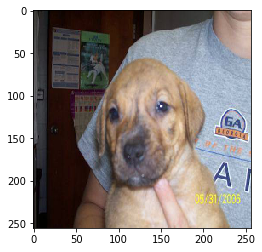

I am 59.08% sure this is a Cat


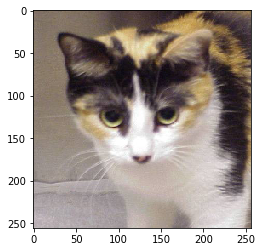

I am 75.08% sure this is a Cat


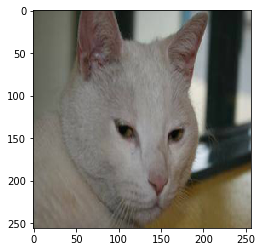

I am 64.66% sure this is a Dog


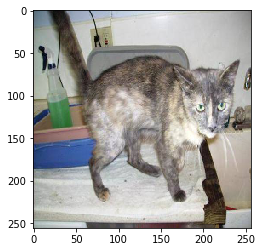

I am 84.50% sure this is a Dog


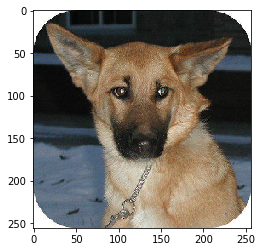

I am 89.23% sure this is a Dog


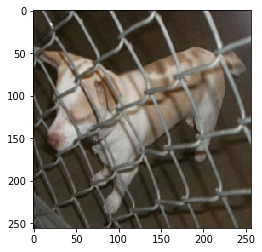

I am 84.89% sure this is a Dog


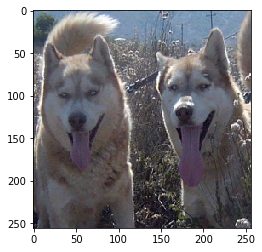

I am 75.49% sure this is a Dog


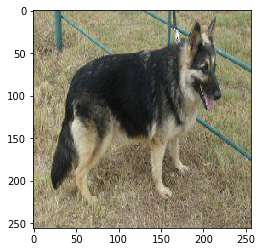

I am 69.65% sure this is a Cat


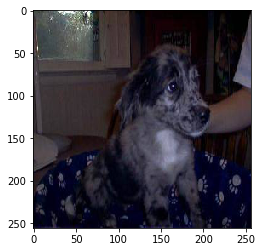

I am 96.17% sure this is a Dog


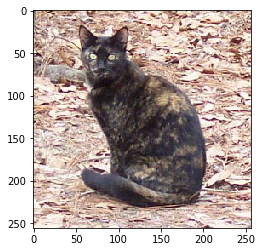

In [9]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))
        
    plt.imshow(test2[i].T)
    plt.show()